# LIVER DISEASE PREDICTION

This project was created for BPC-UIM (Umělá inteligence v medícíne) class @ VUT Brno.

Created by <br>
Viktor Morovič <br>
Filip Sedlár <br>
Matúš Smolka <br>

In [1]:
# importing dependencies

# built-in libs
import os
import time

# NN
import tqdm
import shap

# basic data analytics libs
import numpy as np
import pandas as pd
import seaborn as sns

# Principal component analysis
from sklearn.decomposition import PCA

# pozrieť jednotlivé scipy moduly pre rýchlejšie načítanie


### Loading data and analysis

Features explanation: <br>
- Věk pacienta (Age of the patient) <br>
- Pohlaví pacienta (Gender of the patient)<br>
- Celkový bilirubin (Total Bilirubin)<br>
- Přímý bilirubin (Direct Bilirubin)<br>
- Alkalická fosfatáza (Alkaline Phosphatase)<br>
- Alaninaminotransferáza (Alamine Aminotransferase, ALT)<br>
- Aspartátaminotransferáza (Aspartate Aminotransferase, AST)<br>
- Celkové bílkoviny (Total Proteins)<br>
- Albumin (Albumin)<br>
- Poměr albumin/globulin (Albumin and Globulin Ratio)<br>
- Dataset: Pole určující, zda pacient spadá do skupiny s onemocněním jater nebo bez něj<br>

***classification*** - patient is sick / healthy

In [2]:
path = os.getcwd()
# loading raw DataFrame
rdf = pd.read_csv(f"{path}/liver-disease_data.csv")

# for full display rdf.style
display(rdf)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,60.0,Male,1.50000,0.6,360.0,230.0,298.0,4.5,2.0,0.80,1
1,54.0,Female,5.50000,3.2,350.0,67.0,42.0,7.0,3.2,0.80,1
2,26.0,Male,-30.17537,0.8,180.0,22.0,19.0,8.2,4.1,1.00,2
3,60.0,Male,0.60000,0.1,186.0,20.0,21.0,6.2,3.3,1.10,2
4,46.0,Female,0.80000,0.2,185.0,24.0,15.0,7.9,3.7,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
491,75.0,Female,0.80000,0.2,188.0,20.0,29.0,4.4,1.8,0.60,1
492,36.0,Male,5.30000,2.3,145.0,32.0,92.0,5.1,2.6,1.00,2
493,37.0,Male,0.70000,0.2,235.0,96.0,54.0,9.5,4.9,1.00,1
494,17.0,Female,0.50000,0.1,206.0,28.0,21.0,7.1,4.5,1.70,2


### Data inspection and preprocessing

C:\Users\vmoro\AppData\Local\Temp\ipykernel_17216\3769191861.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(_)


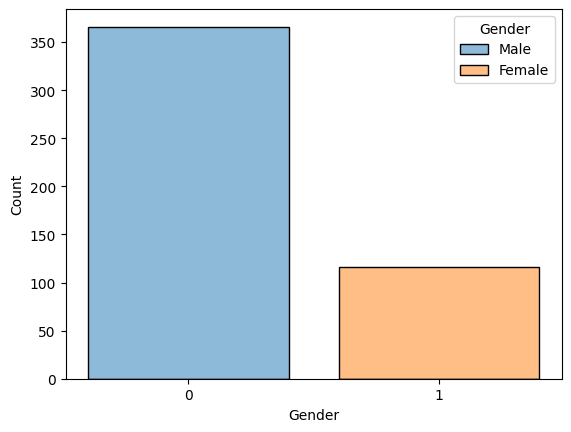

In [3]:
# Creating deep copy and replacing negative (non-sense) values
df = rdf.copy(deep=True)

# Assigning gender discrete values 
_ = {"Male": 0, "Female": 1}
df['Gender'] = df['Gender'].replace(_)
df[df < 0] = np.nan

sns.histplot(
    data=df,
    x='Gender',
    discrete=True,
    hue=rdf['Gender'], 
    shrink = .8).set_xticks([0,1])

# We can see missing entries
# df['Gender'].unique()

#sns.violinplot(data=rdf, x='Gender', hue='Selector')

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,60.0,0.0,1.5,0.6,360.0,230.0,298.0,4.5,2.0,0.80,1
1,54.0,1.0,5.5,3.2,350.0,67.0,42.0,7.0,3.2,0.80,1
2,26.0,0.0,NaN,0.8,180.0,22.0,19.0,8.2,4.1,1.00,2
3,60.0,0.0,0.6,0.1,186.0,20.0,21.0,6.2,3.3,1.10,2
4,46.0,1.0,0.8,0.2,185.0,24.0,15.0,7.9,3.7,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
491,75.0,1.0,0.8,0.2,188.0,20.0,29.0,4.4,1.8,0.60,1
492,36.0,0.0,5.3,2.3,145.0,32.0,92.0,5.1,2.6,1.00,2
493,37.0,0.0,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.00,1
494,17.0,1.0,0.5,0.1,206.0,28.0,21.0,7.1,4.5,1.70,2


<Axes: ylabel='TB'>

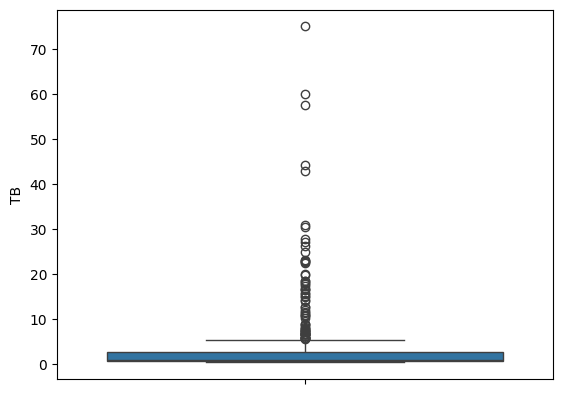

In [13]:
display(df)

sns.boxplot(data=df, y = 'TB')